In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from config.detector_config import detectors
import models.detector as de
from models.particle import Particle, LLParticle
import utils.fit_utils as fit_utils
import utils.data_io as data_io
import utils.evaluation as evaluation
from config.plot_config import *

181
Total price is within budget: 5499


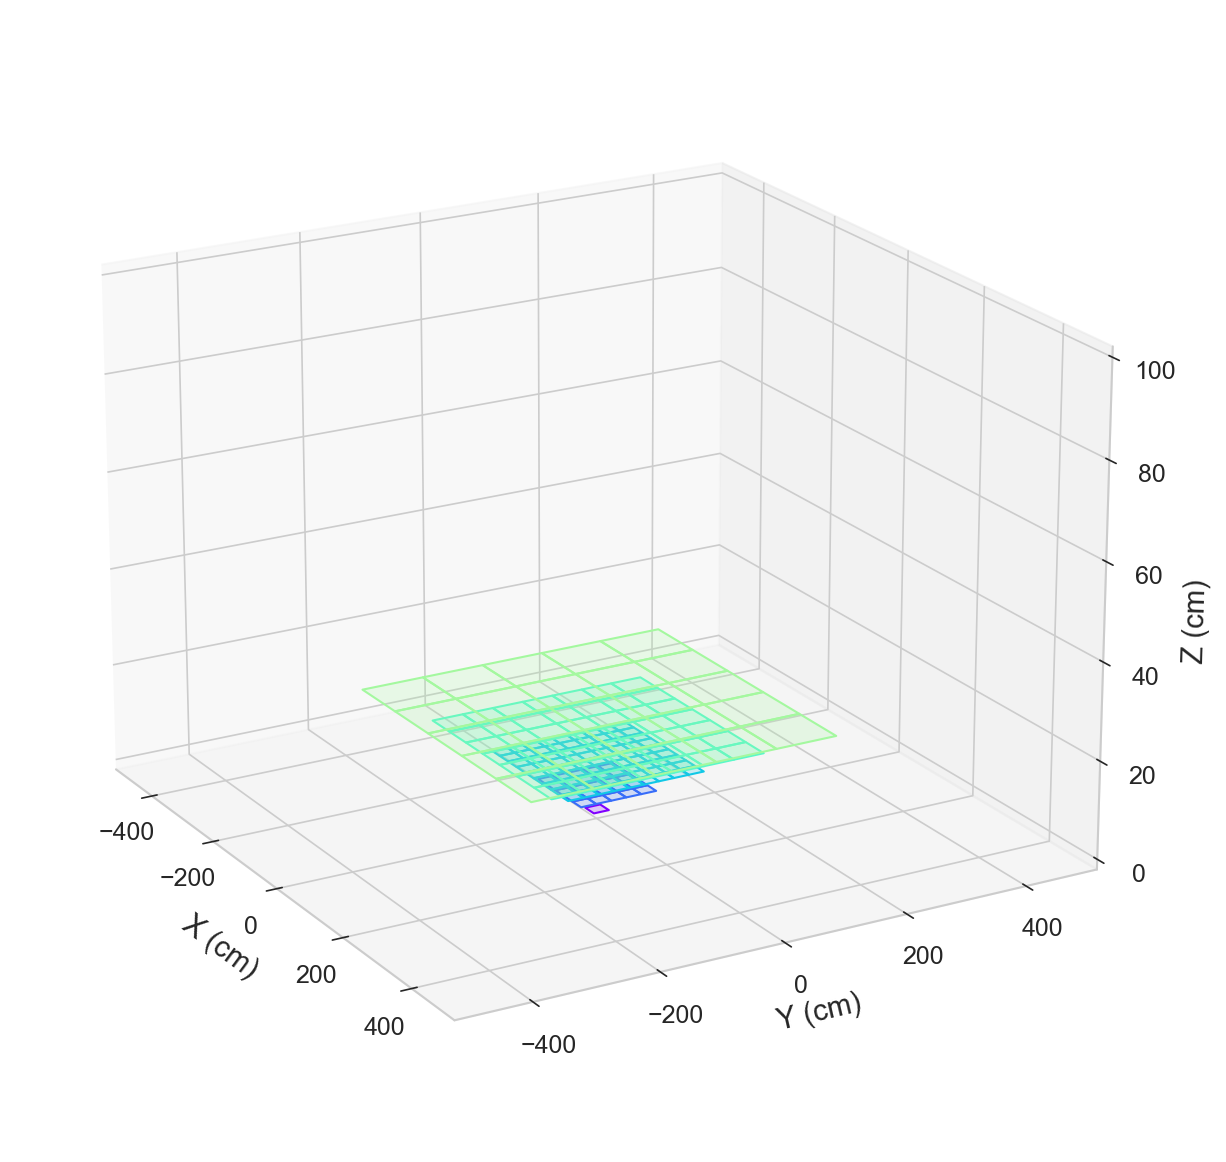

In [2]:
print(len(detectors))

# Cost
de.Get_Price(detectors)

# Draw detectors
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in detectors:
    z = d.position[2]
    color = get_color_by_z(z)
    d.plot(ax, color=color)

plt.show()

In [3]:
# Particle Setting
P1 = LLParticle()
P2, P3 = P1.decay()
print(f"Mother particle: {P1}")


print("\n")
print(f"decay product 1: {P2}")
print(f"decay product 1: {P3}")


hit_detectors = [d for d in detectors if d.is_hit(P1)]

print("\n")
print(f"Particle go throuth {len(hit_detectors)} Detector")
for d in hit_detectors:
    print(f"Center of Detector: {d.position}, lenth: {d.size}, time: {d.hit_time}")

time = P1.decay_time

Mother particle: Particle(position=[0. 0. 0.], direction=[-0.03446492  0.85206366  0.5223023 ])
Decay time=24, Decay at=[-0.82715818 20.44952779 12.53525518]
Decay Product1 direction=[0.22169504 0.13137337 0.96622583]
Decay Product2 direction=[-0.21365108  0.97335031 -0.08332102]


decay product 1: Particle(position=[-0.82715818 20.44952779 12.53525518], direction=[0.22169504 0.13137337 0.96622583])
decay product 1: Particle(position=[-0.82715818 20.44952779 12.53525518], direction=[-0.21365108  0.97335031 -0.08332102])


Particle go throuth 3 Detector
Center of Detector: (0, 0, 0), lenth: 25, time: 0.0
Center of Detector: (0, 0, 5), lenth: 25, time: 9.57300017449386
Center of Detector: (0, 25, 10), lenth: 25, time: 19.14600034898772


In [4]:
hit_detectors2 = [d for d in detectors if d.is_hit(P2)]
print(f"Particle go throuth {len(hit_detectors2)} Detector")
for d in hit_detectors2:
    print(f"Center of Detector: {d.position}, lenth: {d.size}, time: {d.hit_time}")

Particle go throuth 2 Detector
Center of Detector: (0, 0, 15), lenth: 50, time: 2.5508993392619415
Center of Detector: (0, 0, 20), lenth: 100, time: 7.725673043642557


In [5]:
hit_detectors3 = [d for d in detectors if d.is_hit(P3)]
print(f"Particle go throuth {len(hit_detectors3)} Detector")
for d in hit_detectors3:
    print(f"Center of Detector: {d.position}, lenth: {d.size}, time: {d.hit_time}")

Particle go throuth 2 Detector
Center of Detector: (0, 0, 15), lenth: 50, time: -29.581307239340116
Center of Detector: (0, -100, 20), lenth: 100, time: -89.59017097115292


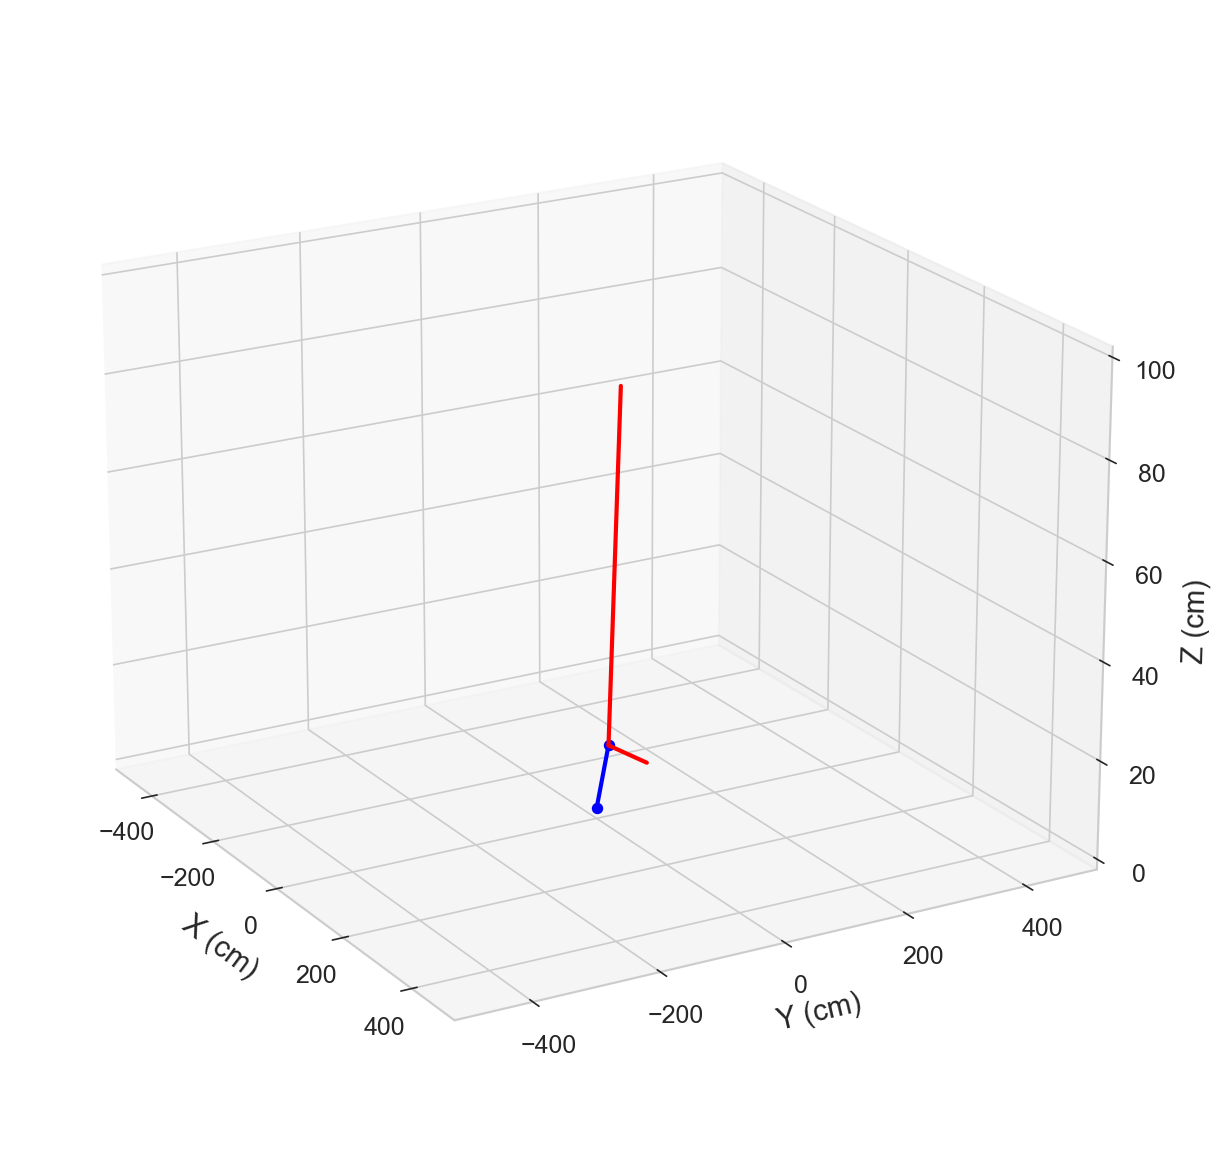

In [6]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)


time = P1.decay_time
ax.scatter(P1.position[0], P1.position[1], P1.position[2], color='b')
ax.scatter(P1.position_t(time)[0], P1.position_t(time)[1], P1.position_t(time)[2], color='b')
ax.plot([P1.position[0], P1.position_t(time)[0]], [P1.position[1],P1.position_t(time)[1]],[P1.position[2],P1.position_t(time)[2]], color="b", zorder=100)
ax.plot([P3.position[0], P3.position_t(100)[0]], [P3.position[1],P3.position_t(100)[1]],[P3.position[2],P3.position_t(100)[2]], color="red", zorder=100)
ax.plot([P2.position[0], P2.position_t(100)[0]], [P2.position[1],P2.position_t(100)[1]],[P2.position[2],P2.position_t(100)[2]], color="red", zorder=100)


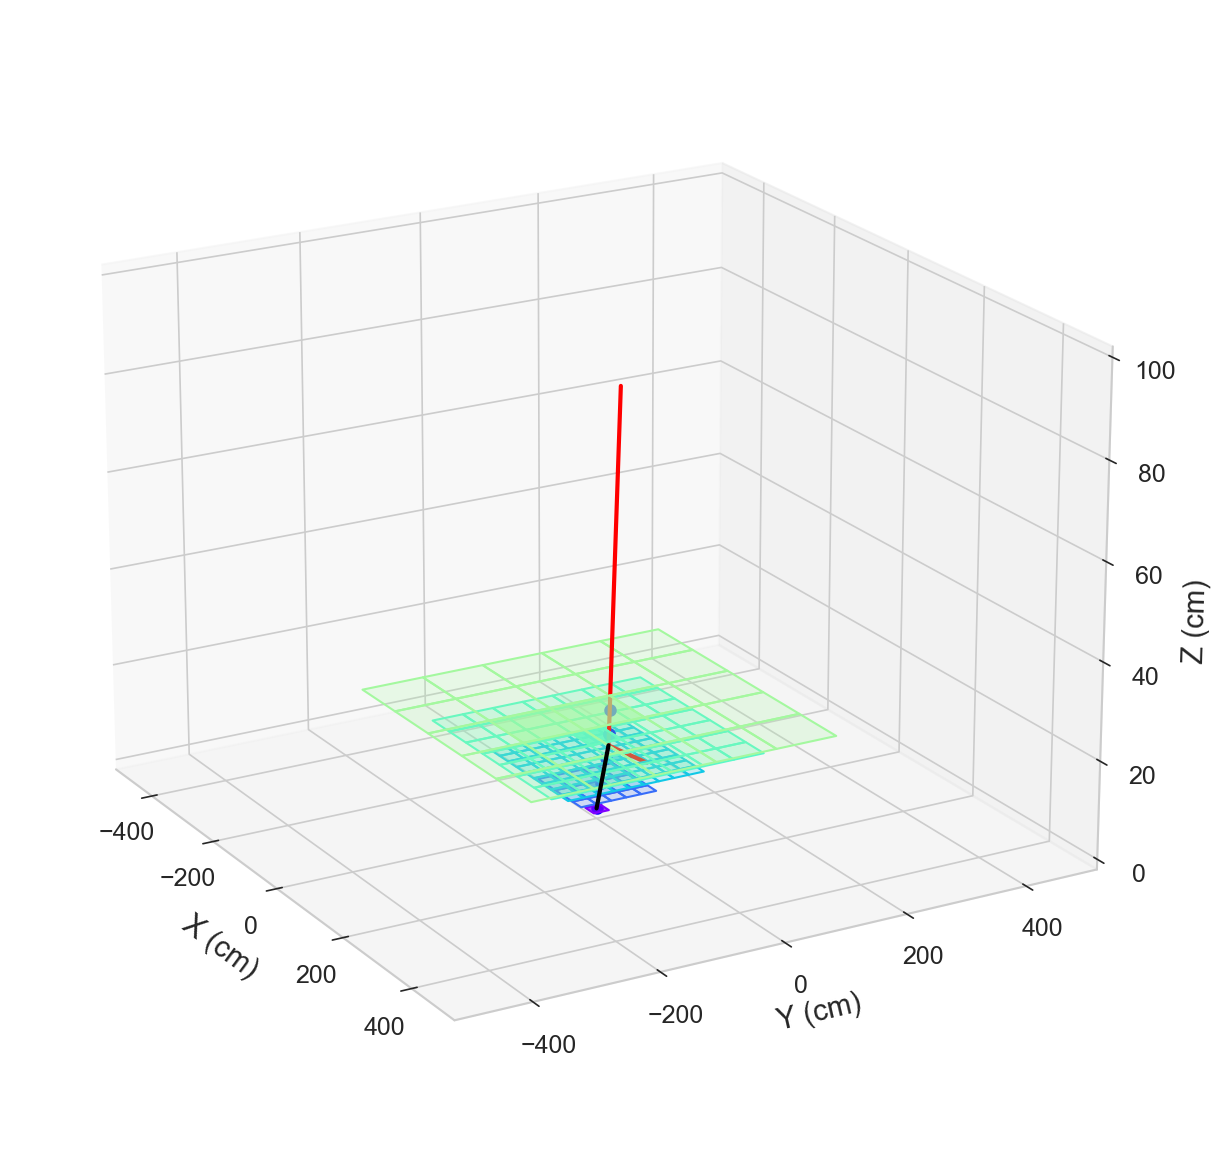

In [7]:
# Draw detectors and particle track
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in detectors:
    z = d.position[2]
    color = get_color_by_z(z)
    if d in hit_detectors or d in hit_detectors2 or d in hit_detectors3:
        pass
    else:
        d.plot(ax, color=color)


for d in hit_detectors:
    z = d.position[2]
    color = get_color_by_z(z)
    d.plot(ax, color=color)
    d.interaction_point(ax, P1)

for d in hit_detectors2:
    z = d.position[2]
    color = get_color_by_z(z)
    d.plot(ax, color=color)
    d.interaction_point(ax, P2)

for d in hit_detectors3:
    z = d.position[2]
    color = get_color_by_z(z)
    d.plot(ax, color=color)
    d.interaction_point(ax, P2)


Final_Point = P1.position_t(time)
# set high zorder value to make the track line drawn on top of all Detector Module
ax.plot([P1.position[0], Final_Point[0]], [P1.position[1],Final_Point[1]],[P1.position[2],Final_Point[2]], color="black", zorder=999)
ax.plot([P3.position[0], P3.position_t(100)[0]], [P3.position[1],P3.position_t(100)[1]],[P3.position[2],P3.position_t(100)[2]], color="red", zorder=100)
ax.plot([P2.position[0], P2.position_t(100)[0]], [P2.position[1],P2.position_t(100)[1]],[P2.position[2],P2.position_t(100)[2]], color="red", zorder=100)
plt.show()

In [8]:
hit = hit_detectors + hit_detectors2 + hit_detectors3
for h in hit:
    print(h)

DetectorModule(size=25cm, position=(0, 0, 0), price=12万)
DetectorModule(size=25cm, position=(0, 0, 5), price=12万)
DetectorModule(size=25cm, position=(0, 25, 10), price=12万)
DetectorModule(size=50cm, position=(0, 0, 15), price=35万)
DetectorModule(size=100cm, position=(0, 0, 20), price=100万)
DetectorModule(size=50cm, position=(0, 0, 15), price=35万)
DetectorModule(size=100cm, position=(0, -100, 20), price=100万)


In [9]:
#data_io.save_detected_data(hit_detectors=hit)
data_io.save_detected_data(detectors, [P1, P2, P3])

data_io.save_truth_data(detectors, P1)

----

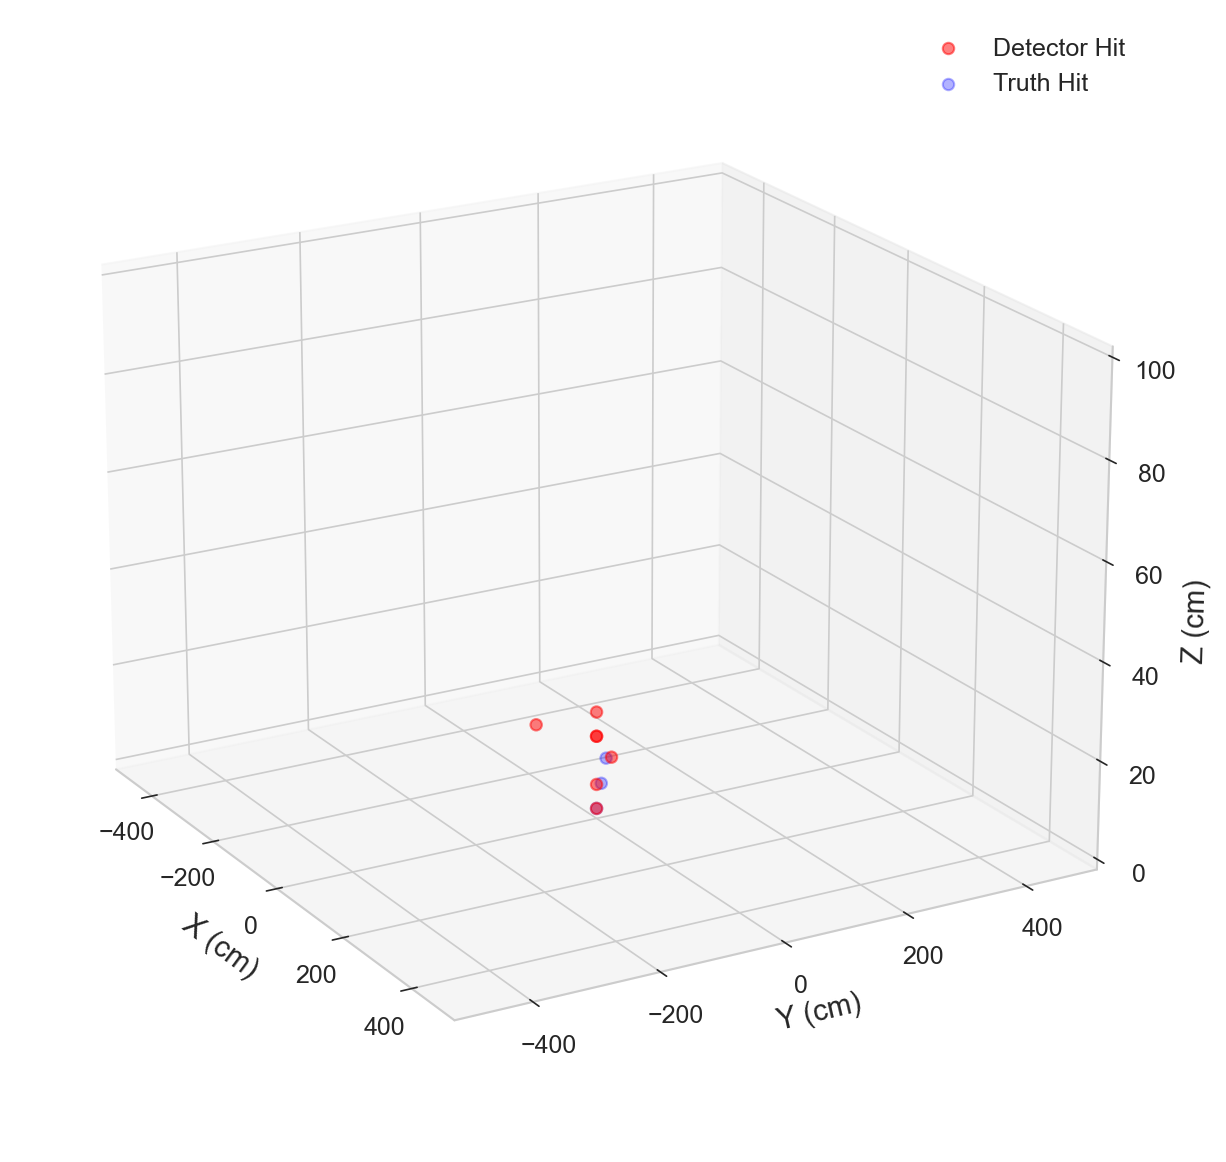

In [10]:
# Read detector data and scatter
detector_data = pd.read_csv('data/detectors.csv')
truth_data = pd.read_csv('data/particle.csv')

points = detector_data[['x', 'y', 'z']].values
track = truth_data[['x', 'y', 'z']].values
x, y, z = points.T
tx, ty, tz = track.T

#for i in range(len(x)):
#    print(f"Detector {i} Center: ({x[i]}, {y[i]}, {z[i]}) vs. Truth Particle ({tx[i]}, {ty[i]}, {tz[i]})")


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.scatter(x, y, z, c='r', s=30, label='Detector Hit', marker='o', alpha=0.5)
ax.scatter(tx, ty, tz, c='b', s=30, label='Truth Hit', marker='o', alpha=0.3)


plt.legend()
plt.show()